<a href="https://colab.research.google.com/github/ItsNotRohit02/Attendance-System-using-Facial-Recognition/blob/main/DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from pathlib import Path
import os
import zipfile

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_path = Path("data/")
csv_path = data_path / "TemperatureData"

if csv_path.is_dir():
  print(f"{csv_path} already exists")

else:
  print(f"{csv_path} created")
  csv_path.mkdir(parents=True, exist_ok=True)

  with open(data_path / "DailyTemperatures.zip", "wb") as f:
    request = requests.get("https://drive.google.com/uc?export=download&id=1l9PwR_2LjZqh3DEUUvAMKoZypoW6tFfc")
    print("Downloading")
    f.write(request.content)

  with zipfile.ZipFile(data_path / "DailyTemperatures.zip", "r") as zip_ref:
    zip_ref.extractall(csv_path)
    print("Downloaded")

  os.remove(data_path / "DailyTemperatures.zip")

data/TemperatureData created
Downloading
Downloaded


##Data Loading and Overview

In [4]:
df = pd.read_csv("/content/data/TemperatureData/city_temperature.csv")

<ipython-input-4-4e45620183e3>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/data/TemperatureData/city_temperature.csv")


In [5]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [6]:
df.tail()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8
2906326,North America,US,Additional Territories,San Juan Puerto Rico,7,31,2013,83.6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [8]:
df.shape

(2906327, 8)

2,906,327 Rows & 8 Columns

In [9]:
countries = df['Country'].unique()
print(countries)

['Algeria' 'Burundi' 'Benin' 'Central African Republic' 'Congo' 'Egypt'
 'Ethiopia' 'Gabon' 'Gambia' 'Guinea' 'Guinea-Bissau' 'Ivory Coast'
 'Kenya' 'Morocco' 'Madagascar' 'Mauritania' 'Malawi' 'Mozambique'
 'Namibia' 'Nigeria' 'Senegal' 'Sierra Leone' 'South Africa' 'Togo'
 'Tunisia' 'Tanzania' 'Uganda' 'Zambia' 'Bangladesh' 'China' 'Hong Kong'
 'India' 'Indonesia' 'Japan' 'Kazakhstan' 'Kyrgyzstan' 'Laos' 'Malaysia'
 'Mongolia' 'Myanmar (Burma)' 'Nepal' 'North Korea' 'Pakistan'
 'Philippines' 'Singapore' 'South Korea' 'Sri Lanka' 'Taiwan' 'Tajikistan'
 'Thailand' 'Turkmenistan' 'Uzbekistan' 'Vietnam' 'Australia'
 'New Zealand' 'Albania' 'Austria' 'Belarus' 'Belgium' 'Bulgaria'
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Finland' 'France'
 'Germany' 'Georgia' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy'
 'Latvia' 'Macedonia' 'The Netherlands' 'Norway' 'Poland' 'Portugal'
 'Romania' 'Russia' 'Serbia-Montenegro' 'Slovakia' 'Spain' 'Sweden'
 'Switzerland' 'Ukraine' 'United Kingdom' 

In [10]:
cities = df['City'].unique()
print(cities)

['Algiers' 'Bujumbura' 'Cotonou' 'Bangui' 'Brazzaville' 'Cairo'
 'Addis Ababa' 'Libreville' 'Banjul' 'Conakry' 'Bissau' 'Abidjan'
 'Nairobi' 'Rabat' 'Antananarivo' 'Nouakchott' 'Lilongwe' 'Maputo'
 'Windhoek' 'Niamey' 'Lagos' 'Dakar' 'Freetown' 'Capetown' 'Lome' 'Tunis'
 'Dar Es Salaam' 'Kampala' 'Lusaka' 'Dhaka' 'Beijing' 'Chengdu'
 'Guangzhou' 'Shanghai' 'Shenyang' 'Hong Kong' 'Bombay (Mumbai)'
 'Calcutta' 'Chennai (Madras)' 'Delhi' 'Jakarta' 'Osaka' 'Sapporo' 'Tokyo'
 'Almaty' 'Bishkek' 'Vientiane' 'Kuala Lumpur' 'Ulan-bator' 'Rangoon'
 'Katmandu' 'Pyongyang' 'Islamabad' 'Karachi' 'Manila' 'Singapore' 'Seoul'
 'Colombo' 'Taipei' 'Dusanbe' 'Bangkok' 'Ashabad' 'Tashkent' 'Hanoi'
 'Brisbane' 'Canberra' 'Melbourne' 'Perth' 'Sydney' 'Auckland' 'Tirana'
 'Vienna' 'Minsk' 'Brussels' 'Sofia' 'Zagreb' 'Nicosia' 'Prague'
 'Copenhagen' 'Helsinki' 'Paris' 'Bordeaux' 'Bonn' 'Frankfurt' 'Hamburg'
 'Munich' 'Tbilisi' 'Athens' 'Budapest' 'Reykjavik' 'Dublin' 'Milan'
 'Rome' 'Riga' 'Skopje' 'Amsterd

In [11]:
len(countries), len(cities)

(125, 321)

In [12]:
print("Number of Countries:", len(countries))
print("Number of Cities:", len(cities))

Number of Countries: 125
Number of Cities: 321


##Data Cleaning and Data Exploration

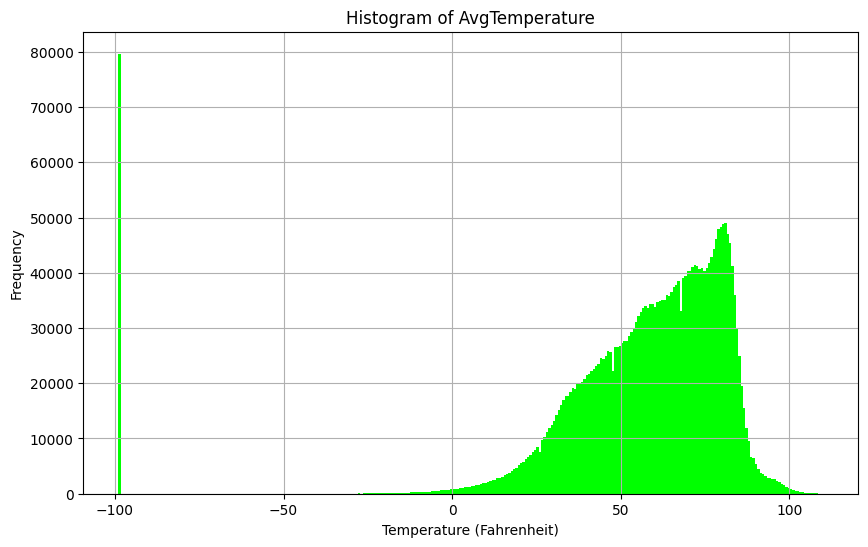

In [13]:
plt.figure(figsize=(10, 6))

plt.hist(df['AvgTemperature'], bins=300, color='lime')

plt.title('Histogram of AvgTemperature')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

Looks like all erroneous data around -99 F

In [14]:
erroneous_rows = df[df['AvgTemperature'] < -90]

In [15]:
erroneous_rows.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
220,Africa,Algeria,NaN,Algiers,8,9,1995,-99.0
221,Africa,Algeria,NaN,Algiers,8,10,1995,-99.0
408,Africa,Algeria,NaN,Algiers,2,13,1996,-99.0
409,Africa,Algeria,NaN,Algiers,2,14,1996,-99.0
1453,Africa,Algeria,NaN,Algiers,12,24,1998,-99.0


In [16]:
erroneous_rows.tail()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
2905471,North America,US,Additional Territories,San Juan Puerto Rico,3,29,2011,-99.0
2905534,North America,US,Additional Territories,San Juan Puerto Rico,5,31,2011,-99.0
2905689,North America,US,Additional Territories,San Juan Puerto Rico,11,2,2011,-99.0
2905726,North America,US,Additional Territories,San Juan Puerto Rico,12,9,2011,-99.0
2905749,North America,US,Additional Territories,San Juan Puerto Rico,1,1,2012,-99.0


In [17]:
old_mean_value = df['AvgTemperature'].mean()
old_median_value = df['AvgTemperature'].median()
old_std_dev_value = df['AvgTemperature'].std()

print("Mean:", old_mean_value)
print("Median:", old_median_value)
print("Standard Deviation:", old_std_dev_value)

Mean: 56.00492078145366
Median: 62.5
Standard Deviation: 32.12359394724401


In [18]:
old_min_value = df['AvgTemperature'].min()
old_max_value = df['AvgTemperature'].max()

print("Minimum Value:", old_min_value)
print("Maximum Value:", old_max_value)

Minimum Value: -99.0
Maximum Value: 110.0


Removing erroneous values

In [19]:
df = df[df['AvgTemperature'] >= -90]

##Data Summary and Statistics

In [20]:
mean_value = df['AvgTemperature'].mean()
median_value = df['AvgTemperature'].median()
std_dev_value = df['AvgTemperature'].std()

print("Mean:", mean_value)
print("Median:", median_value)
print("Standard Deviation:", std_dev_value)

Mean: 60.37388411390846
Median: 63.3
Standard Deviation: 19.09743979319743


In [21]:
min_value = df['AvgTemperature'].min()
max_value = df['AvgTemperature'].max()

print("Minimum Value:", min_value)
print("Maximum Value:", max_value)

Minimum Value: -50.0
Maximum Value: 110.0


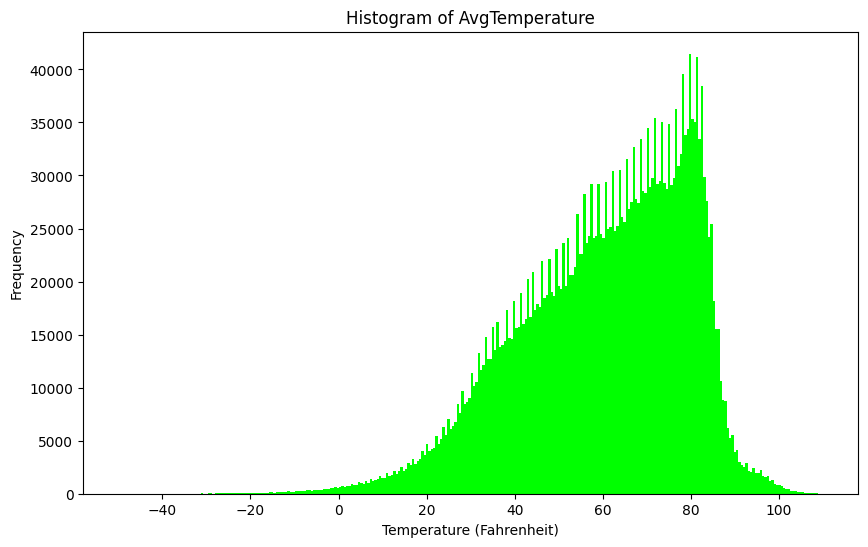

In [22]:
plt.figure(figsize=(10, 6))

plt.hist(df['AvgTemperature'], bins=300, color='lime')

plt.title('Histogram of AvgTemperature')
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Frequency')

plt.show()

In [23]:
df.shape

(2826655, 8)

2,826,655 Rows & 8 Columns

##Data Visualization

Time Series Graph

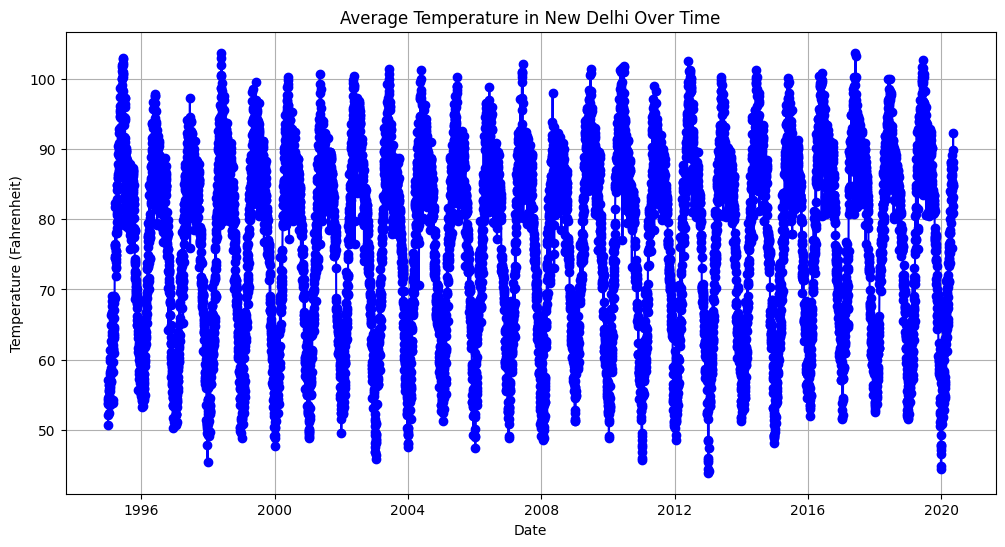

In [24]:
df['Date'] = pd.to_datetime(df[['Month', 'Day', 'Year']])

delhi_df = df[df['City'] == 'Delhi']

plt.figure(figsize=(12, 6))
plt.plot(delhi_df['Date'], delhi_df['AvgTemperature'], marker='o', linestyle='-', color='blue')

plt.title('Average Temperature in New Delhi Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (Fahrenheit)')
plt.grid(True)

plt.show()

##Data Preprocessing

In [25]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2,1995-01-01
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4,1995-01-02
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8,1995-01-03
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4,1995-01-04
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9,1995-01-05


Adding a City Code

In [26]:
code = df['City'].factorize()[0]
df.insert(2, column='CityCode', value=code)

In [27]:
df.head()

,Region,Country,CityCode,State,City,Month,Day,Year,AvgTemperature,Date
0,Africa,Algeria,0,NaN,Algiers,1,1,1995,64.2,1995-01-01
1,Africa,Algeria,0,NaN,Algiers,1,2,1995,49.4,1995-01-02
2,Africa,Algeria,0,NaN,Algiers,1,3,1995,48.8,1995-01-03
3,Africa,Algeria,0,NaN,Algiers,1,4,1995,46.4,1995-01-04
4,Africa,Algeria,0,NaN,Algiers,1,5,1995,47.9,1995-01-05


Removing State Column

In [28]:
df = df.drop('State', axis=1)

In [29]:
df.head()

,Region,Country,CityCode,City,Month,Day,Year,AvgTemperature,Date
0,Africa,Algeria,0,Algiers,1,1,1995,64.2,1995-01-01
1,Africa,Algeria,0,Algiers,1,2,1995,49.4,1995-01-02
2,Africa,Algeria,0,Algiers,1,3,1995,48.8,1995-01-03
3,Africa,Algeria,0,Algiers,1,4,1995,46.4,1995-01-04
4,Africa,Algeria,0,Algiers,1,5,1995,47.9,1995-01-05


Converting Fahrenheit to Celsius

In [30]:
df['AvgTemp'] = (df['AvgTemperature'] - 32) * 5 / 9

df['AvgTemp'] = df['AvgTemp'].round(2)

df.drop('AvgTemperature', axis=1, inplace=True)

In [31]:
df.tail()

,Region,Country,CityCode,City,Month,Day,Year,Date,AvgTemp
2906322,North America,US,320,San Juan Puerto Rico,7,27,2013,2013-07-27,28.00
2906323,North America,US,320,San Juan Puerto Rico,7,28,2013,2013-07-28,27.56
2906324,North America,US,320,San Juan Puerto Rico,7,29,2013,2013-07-29,29.00
2906325,North America,US,320,San Juan Puerto Rico,7,30,2013,2013-07-30,28.78
2906326,North America,US,320,San Juan Puerto Rico,7,31,2013,2013-07-31,28.67


##Data Aggregation and Grouping

###Grouping and Calculating Summary Statistics

In [32]:
grouped_by_city = df.groupby('City')['AvgTemp'].describe()
grouped_by_city

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Abidjan,9002.0,26.803840,1.935038,4.61,25.61,27.00,28.11,31.44
Abilene,9238.0,18.183889,8.918865,-10.28,11.44,19.22,25.78,34.56
Abu Dhabi,9232.0,28.255418,6.262394,13.22,22.50,29.17,33.72,41.83
Addis Ababa,7143.0,17.194662,1.899321,10.22,15.89,17.00,18.39,25.00
Akron Canton,9249.0,10.360997,10.248400,-21.17,2.00,11.28,19.44,30.06
...,...,...,...,...,...,...,...,...
Yerevan,3188.0,13.065091,10.562914,-22.67,3.94,13.44,22.56,33.22
Youngstown,9249.0,9.905707,10.044296,-21.33,1.78,10.78,18.72,30.39
Yuma,4087.0,24.302554,7.975264,7.39,17.11,23.89,32.11,41.94


In [33]:
grouped_by_year = df.groupby('Year')['AvgTemp'].describe()
grouped_by_year

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1995,112152.0,15.234244,10.616441,-40.89,8.17,16.67,23.83,41.83
1996,112734.0,14.819349,11.115728,-40.94,7.56,16.67,23.61,42.50
1997,112952.0,15.074233,10.527698,-43.44,7.67,16.61,23.44,41.89
1998,111102.0,16.039134,10.222682,-41.39,8.94,17.17,24.44,42.89
1999,113406.0,15.737608,10.177983,-45.56,8.78,17.06,23.94,42.28
2000,114169.0,15.388362,10.598285,-43.83,8.39,16.89,23.78,42.89
2001,115277.0,15.736821,10.401654,-38.44,8.67,17.28,24.17,41.50
2002,113616.0,15.697982,10.508491,-37.78,8.00,17.22,24.56,42.33
2003,114283.0,15.554633,10.769737,-36.28,8.28,17.33,24.22,41.67


Removing Year 2020 (Incomplete Data)

In [34]:
grouped_by_year.reset_index(inplace=True)  # Resetting index for 'Year' to be a column
grouped_by_year.drop(25, inplace=True)
grouped_by_year

,Year,count,mean,std,min,25%,50%,75%,max
0,1995,112152.0,15.234244,10.616441,-40.89,8.17,16.67,23.83,41.83
1,1996,112734.0,14.819349,11.115728,-40.94,7.56,16.67,23.61,42.50
2,1997,112952.0,15.074233,10.527698,-43.44,7.67,16.61,23.44,41.89
3,1998,111102.0,16.039134,10.222682,-41.39,8.94,17.17,24.44,42.89
4,1999,113406.0,15.737608,10.177983,-45.56,8.78,17.06,23.94,42.28
5,2000,114169.0,15.388362,10.598285,-43.83,8.39,16.89,23.78,42.89
6,2001,115277.0,15.736821,10.401654,-38.44,8.67,17.28,24.17,41.50
7,2002,113616.0,15.697982,10.508491,-37.78,8.00,17.22,24.56,42.33
8,2003,114283.0,15.554633,10.769737,-36.28,8.28,17.33,24.22,41.67
9,2004,114597.0,15.607175,10.469939,-41.11,8.78,17.22,23.89,42.28


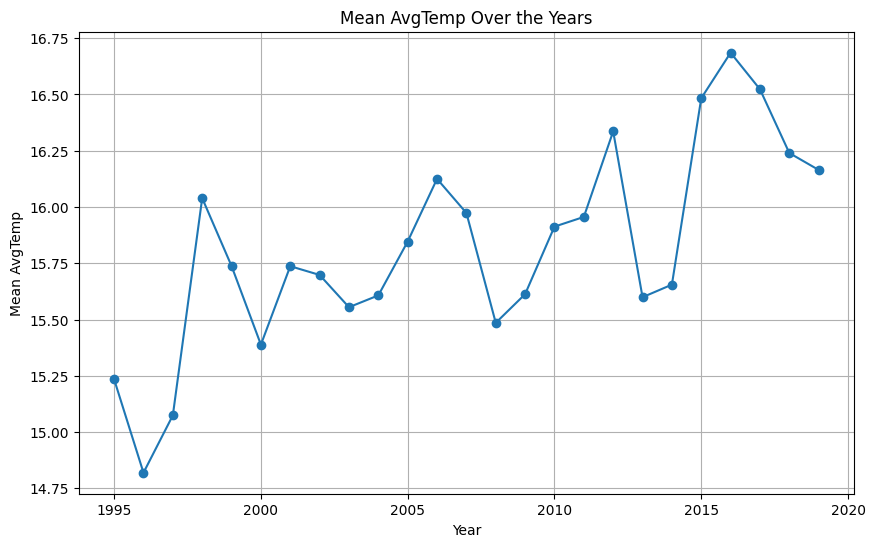

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_by_year['Year'], grouped_by_year['mean'], marker='o', linestyle='-')
plt.title('Mean AvgTemp Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean AvgTemp')
plt.grid(True)
plt.show()


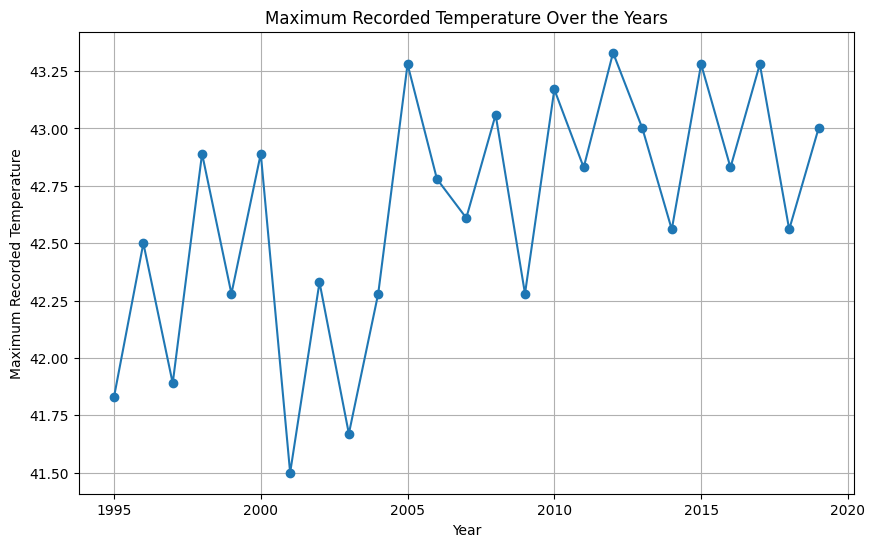

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_by_year['Year'], grouped_by_year['max'], marker='o', linestyle='-')
plt.title('Maximum Recorded Temperature Over the Years')
plt.xlabel('Year')
plt.ylabel('Maximum Recorded Temperature')
plt.grid(True)
plt.show()


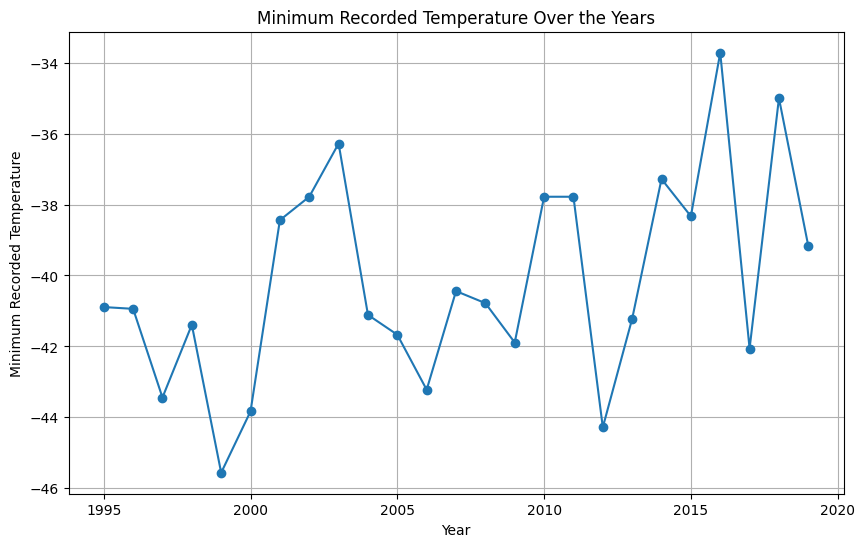

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_by_year['Year'], grouped_by_year['min'], marker='o', linestyle='-')
plt.title('Minimum Recorded Temperature Over the Years')
plt.xlabel('Year')
plt.ylabel('Minimum Recorded Temperature')
plt.grid(True)
plt.show()


**It is clearly seen that the average temperature is gradually rising year over year. The maximum and minimum temperature also increases, pointing to evidence of global warming.**

In [38]:
grouped_by_region = df.groupby('Region')['AvgTemp'].describe()
grouped_by_region

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Africa,220919.0,23.557005,5.151503,0.72,20.33,24.89,27.39,39.33
Asia,306163.0,20.060961,10.956682,-38.44,14.28,24.22,28.17,39.83
Australia/South Pacific,55209.0,16.835391,5.397476,-0.72,13.00,16.72,20.78,36.00
Europe,368702.0,11.081765,8.435566,-29.11,5.06,11.44,17.28,39.17
Middle East,120811.0,23.244834,9.332480,-16.00,17.11,23.67,30.56,43.33
North America,1548160.0,13.416774,10.733381,-45.56,5.83,14.72,22.11,42.06
South/Central America & Carribean,206691.0,22.334465,5.989099,0.44,19.22,23.78,26.94,36.33


In [39]:
grouped_by_region.reset_index(inplace=True)  # Resetting index for 'Region' to be a column
grouped_by_region

,Region,count,mean,std,min,25%,50%,75%,max
0,Africa,220919.0,23.557005,5.151503,0.72,20.33,24.89,27.39,39.33
1,Asia,306163.0,20.060961,10.956682,-38.44,14.28,24.22,28.17,39.83
2,Australia/South Pacific,55209.0,16.835391,5.397476,-0.72,13.00,16.72,20.78,36.00
3,Europe,368702.0,11.081765,8.435566,-29.11,5.06,11.44,17.28,39.17
4,Middle East,120811.0,23.244834,9.332480,-16.00,17.11,23.67,30.56,43.33
5,North America,1548160.0,13.416774,10.733381,-45.56,5.83,14.72,22.11,42.06
6,South/Central America & Carribean,206691.0,22.334465,5.989099,0.44,19.22,23.78,26.94,36.33


<Figure size 1000x600 with 0 Axes>

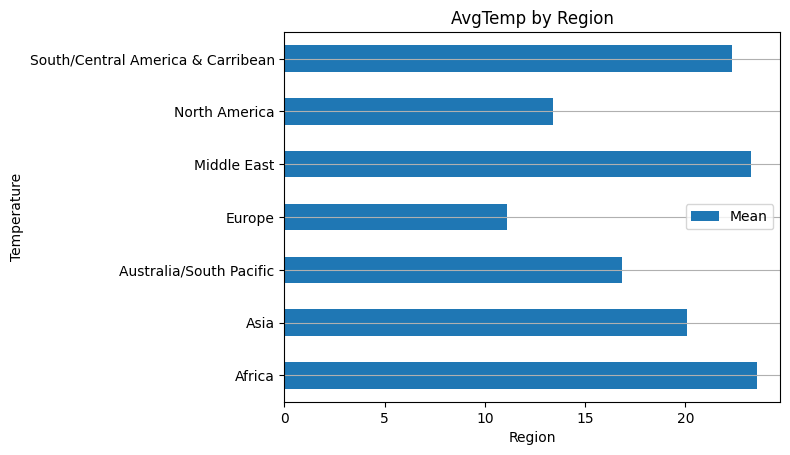

In [40]:
plt.figure(figsize=(10, 6))
grouped_by_region.plot(x='Region', y=['mean'], kind='barh', stacked=True)
plt.title('AvgTemp by Region')
plt.xlabel('Region')
plt.ylabel('Temperature')
plt.legend(['Mean'])
plt.grid(axis='y')
plt.show()

In [41]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [42]:
grouped_data = df.groupby(['Region', df['Year'].dt.year])['AvgTemp'].mean().reset_index()

In [43]:
grouped_data = grouped_data[grouped_data['Year'] <= 2019]

In [44]:
pivot_data = grouped_data.pivot(index='Year', columns='Region', values='AvgTemp')

<Figure size 2000x800 with 0 Axes>

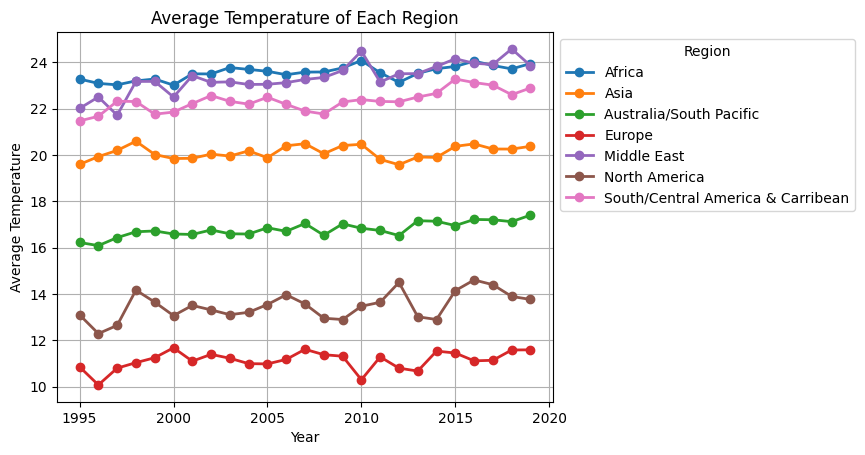

In [48]:
plt.figure(figsize=(20, 8))
pivot_data.plot(kind='line', marker='o', linewidth=2)
plt.title('Average Temperature of Each Region')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.legend(title='Region', bbox_to_anchor=(1, 1))
plt.show()

##Data Transformation

In [46]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['AvgTemp']

scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [47]:
df.head()

,Region,Country,CityCode,City,Month,Day,Year,Date,AvgTemp
0,Africa,Algeria,0,Algiers,1,1,1995-01-01,1995-01-01,0.713804
1,Africa,Algeria,0,Algiers,1,2,1995-01-01,1995-01-02,0.621330
2,Africa,Algeria,0,Algiers,1,3,1995-01-01,1995-01-03,0.617505
3,Africa,Algeria,0,Algiers,1,4,1995-01-01,1995-01-04,0.602542
4,Africa,Algeria,0,Algiers,1,5,1995-01-01,1995-01-05,0.611880
